# Data Modeling with Scikit-Learn

**Outline:**

* [Intro to Scikit-Learn](#Intro-to-Scikit-Learn)
* [Importing Built-In Datasets](#Importing-Built-In-Datasets)
* [Creating a Model](#Creating-a-Model)
* [Training and Testing a Model](#Training-and-Testing-a-Model)
  * [Performing Cross-Validation](#Performing-Cross-Validation)
  * [Selecting Features](#Selecting-Features)
  * [Searching for Optimal Model Parameters](#Searching-for-Optimal-Model-Parameters)
* [Evaluating a Model](#Evaluating-a-Model)

![](images/supervised-classification.png)
<div style="text-align: center;">
Credit: http://www.nltk.org/book/ch06.html
</div>

## Intro to Scikit-Learn

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://scikit-learn.org/ width=800 height=350></iframe>")

## Importing Built-In Datasets

In [12]:
from sklearn.datasets import load_iris

In [8]:
import sklearn as sk

In [11]:
iris = sk.datasets.load_iris

AttributeError: module 'sklearn' has no attribute 'datasets'

In [13]:
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [29]:
print(iris)

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [22]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [23]:
iris.data.shape

(150, 4)

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [26]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X = iris.data
y = iris.target

## Creating a Model

**Note:** 4-step modeling pattern

### K-nearest neighbors (KNN) classification

**Step 1:** Import the model (import)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** Instantiate an estimator (instantiate)

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

**Step 3:** Fit the model (fit)

In [19]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Make a prediction (predict)

In [20]:
X_new = [[3, 5, 4, 2]]
knn.predict(X_new)

array([2])

In [21]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

### Try a different value for K

In [ ]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=5)

# fit
knn.fit(X, y)

# predict
knn.predict(X_new)

### Use a different classification model

In [30]:
# Try SVM
# import

from sklearn import svm

In [31]:
# instatiate
clf = svm.SVC()

In [32]:
# fit
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
# predict
clf.predict(X_new)

array([2, 1])

In [ ]:
# Try Gaussian model

In [ ]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X, y)

# predict
logreg.predict(X_new)

## Training and Testing a Model

### Procedure 1: Train and test on the (same) entire dataset

In [35]:
from sklearn.datasets import load_iris
from sklearn import metrics

iris = load_iris()

X = iris.data
y = iris.target

### Logistic Regression

In [36]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X, y)

# predict
y_pred = logreg.predict(X)

metrics.accuracy_score(y, y_pred)

0.95999999999999996

### KNN (K = 5)

In [37]:
# import
from sklearn.neighbors import KNeighborsClassifier

# instantiate
knn = KNeighborsClassifier(n_neighbors=5)

# fit
knn.fit(X, y)

# predict
y_pred = knn.predict(X)

metrics.accuracy_score(y, y_pred)

0.96666666666666667

### KNN (K = 1)

In [38]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=1)

# fit
knn.fit(X, y)

# predict
y_pred = knn.predict(X)

metrics.accuracy_score(y, y_pred)

1.0

### Procedure 2: Train and test split

In [39]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)  # random_state = reproducable 

In [ ]:
train_test_split(X, y, test_size=0.4, random_state=4)

In [46]:
type(X_test)

numpy.ndarray

In [40]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [ ]:
print(y_train.shape)
print(y_test.shape)

### Logistic Regression

In [ ]:
# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

### KNN (K = 5)

In [ ]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=5)

# fit
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

### KNN (K = 1)

In [ ]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=1)

# fit
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

### Find a better value for K

In [51]:
k_range = range(1, 26)  # Find best
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

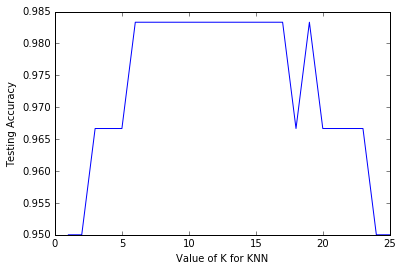

In [52]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Select the best value for K

In [ ]:
# instantiate
knn = KNeighborsClassifier(n_neighbors=11)

# fit
knn.fit(X, y)

# predict
X_new = [[3, 5, 4, 2]]
knn.predict(X_new)

### Performing Cross-Validation

* Parameter tuning
* Model selection
* Feature selection

In [53]:
from sklearn.cross_validation import KFold

kf = KFold(25, n_folds=5, shuffle=False)  # Split date to 5 set, not suffle data

print('{} {:^65} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^10} {} {:^30}'.format(iteration, str(data[0]), str(data[1])))

Iteration                     Training set observations                     Testing set observations
    1      [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [0 1 2 3 4]          
    2      [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]          [5 6 7 8 9]          
    3      [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]        [10 11 12 13 14]       
    4      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]        [15 16 17 18 19]       
    5      [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]        [20 21 22 23 24]       


In [54]:
from sklearn.cross_validation import cross_val_score  # Cross validataion method 

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # Measurement model goodness-to-fit
print(scores)  # Score of each data set

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [55]:
print(scores.mean())

0.966666666667


Try varying the value for K.

In [56]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


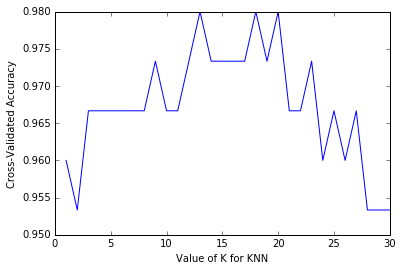

In [57]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Selecting Features

In [58]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [59]:
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [60]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
scores  # Linear Regression measue error, best model max score (lest minus score)

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [62]:
import numpy as np

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

1.6913531708051792

In [63]:
import numpy as np

feature_cols = ['TV', 'Radio']
X = data[feature_cols]
np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean()  # RMS error , choose minimum

1.6796748419090766

In [64]:
import numpy as np

feature_cols = ['TV']
X = data[feature_cols]
np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean()  # RMS error , choose minimum

3.2552805574433696

In [65]:
import numpy as np

feature_cols = ['Radio','Newspaper']
X = data[feature_cols]
np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean()  # RMS error , choose minimum

4.2650094235516081

### Searching for Optimal Model Parameters

In [66]:
from sklearn.grid_search import GridSearchCV  # Auto looping paramter & compare

In [67]:
k_range = list(range(1, 31))  # Create K-range want to test
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [72]:
weight_range = ['uniform','distance']  # Create weight parameter option want to test
print(weight_range)

['uniform', 'distance']


In [75]:
param_grid = dict(n_neighbors=k_range, weights = weight_range)  # Create parameter dict form paramete range
print(param_grid)

{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [79]:
from sklearn.neighbors import KNeighborsClassifier

X = iris.data
y = iris.target

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'weights': 'uniform', 'n_neighbors': 1},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'weights': 'uniform', 'n_neighbors': 2},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, para

In [80]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.95999999999999996, 0.95999999999999996, 0.95333333333333337, 0.95999999999999996, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97333333333333338, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97333333333333338, 0.95999999999999996, 0.9733333333

ValueError: third arg must be a format string

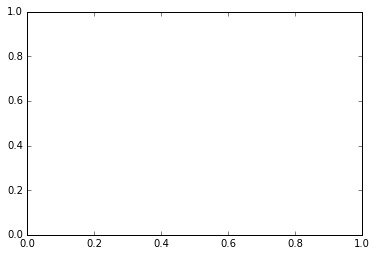

In [81]:
plt.plot(k_range, weight_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [82]:
print(grid.best_score_)  # Best parameter
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'weights': 'uniform', 'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


## Evaluating a Model

UCI Machine Learning Repository: [Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/Spambase)

In [83]:
import pandas as pd

spam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

In [84]:
spam.head()

0     1     2    3     4     5     6     7     8     9  ...    48     49  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00 ...  0.00  0.000   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94 ...  0.00  0.132   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25 ...  0.01  0.143   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.137   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63 ...  0.00  0.135   

    50     51     52     53     54   55    56  57  
0  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]

In [85]:
X = spam.drop(57, axis=1) # drop classification column (col 57)
y = spam[57]  # keep label in another y varible

In [86]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [87]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_test)

In [88]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.903562119896


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class


In [89]:
pd.Series(y_test).value_counts()

0    691
1    460
Name: 57, dtype: int64

In [90]:
pd.Series(y_test).value_counts().head(1) / len(y_test)  # Calculation null accuracy

0    0.600348
Name: 57, dtype: float64

### Confusion Matrix

In [91]:
print(metrics.confusion_matrix(y_test, y_pred_class))
# True Negative , False Positive 
# False Negative , True Positive

[[645  46]
 [ 65 395]]


In [92]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.903562119896


In [93]:
print(metrics.recall_score(y_test, y_pred_class))

0.858695652174


In [94]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [95]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.895691609977
0.895691609977


### Classification Report

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class, target_names=['ham', 'spam']))

             precision    recall  f1-score   support

        ham       0.91      0.93      0.92       691
       spam       0.90      0.86      0.88       460

avg / total       0.90      0.90      0.90      1151



### Receiver Operating Characteristic (ROC)
Binary Classification predict = (0, 1)

In [97]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([  9.99965313e-01,   1.72320876e-01,   1.52662429e-13, ...,
         3.79790404e-02,   2.14615398e-05,   2.71271549e-01])

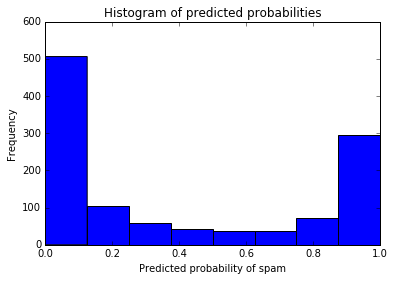

In [98]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of spam')
plt.ylabel('Frequency')

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

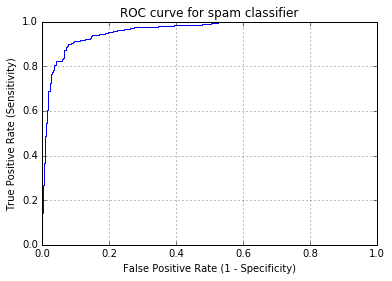

In [100]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for spam classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# ROC curve could above diagonal line = True Positive (Perdit = 1, Actual = 1) >> False Positive (Predit = 1, Actual = 0)

### Area Under Curve (AUC)
The larger the better

In [102]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.96247719121625874